In [121]:
import numpy as np
import pandas as pd
import plotly.express as px
from datetime import datetime,date

%matplotlib inline

df = pd.read_csv('./data/btc-usd-max.csv',index_col=0,parse_dates=True )
#df.index.freq = 'D'
# remove the time from the date time index
df.index = pd.to_datetime(df.index.date)
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df.index

DatetimeIndex(['2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
               '2013-05-06', '2013-05-07',
               ...
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17', '2022-09-18', '2022-09-19',
               '2022-09-20', '2022-09-21'],
              dtype='datetime64[ns]', length=3432, freq=None)

In [1]:
# plotting a graph with plotly where y axis is in logarithmic format
fig = px.line(df, y="price", log_y=True, title='BTC Log Price chart')
fig.update_xaxes(minor=dict(ticks="inside", showgrid=True))
#fig.update_xaxes(rangeslider_visible=True)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_yaxes(autorange=True, automargin=True)
fig.show()

NameError: name 'px' is not defined

In [123]:
df = df.resample('D').first()
df['price'].fillna(method='ffill', inplace=True)

In [124]:
df.sort_values(by='price')

,price
2013-07-06,67.809000
2013-07-07,68.083100
2013-07-09,76.391500
2013-07-10,77.000000
2013-07-08,77.502000
...,...
2021-11-11,65061.054407
2021-11-15,65648.977791
2021-10-21,66237.517550
2021-11-10,67145.374935


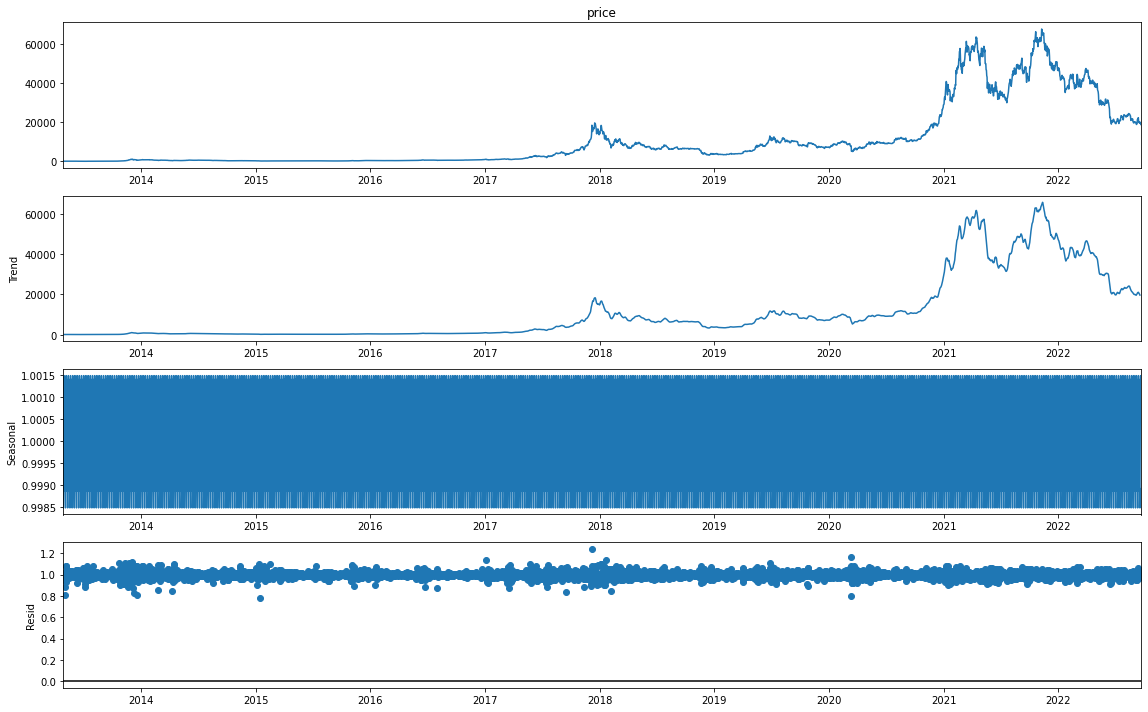

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['price'], model='multiplicative')  # model='mul' also works
from pylab import rcParams
rcParams['figure.figsize']= 16,10
result.plot();